## Feature selection with text data

The IMDB dataset has 50K movie reviews for natural language processing or Text analytics.

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. 

It has a set of 25,000 highly polar movie reviews for training and 25,000 for testing. 

data source: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

#### Import packages

In [219]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import shutil

#OUTPUT FOLDER: START FRESH (DELETE OLD ONE IF EXISTS)
output_dir = "output"
if os.path.exists(output_dir) and os.path.isdir(output_dir):
    shutil.rmtree(output_dir)
os.mkdir(output_dir)


#### Read data

In [192]:
df=pd.read_csv("IMDB-Dataset.csv")
print(df.shape)
print(df.columns)

(50000, 2)
Index(['review', 'sentiment'], dtype='object')


#### Reformat data 

In [193]:
reviews=[]
y=[]
#ITERATE OVER ROWS
# for i in range(0,10):  
for i in range(0,df.shape[0]):
    # QUICKLY CLEAN TEXT
    keep="abcdefghijklmnopqrstuvwxyz "
    replace=".,!;"
    tmp=""
    for char in df["review"][i].replace("<br />","").lower():
        if char in replace:
            tmp+=" "
        if char in keep:
            tmp+=char
    tmp=" ".join(tmp.split())
    reviews.append(tmp)
    # CONVERT STRINGS TO INT TAGS
    if(df["sentiment"][i]=="positive"):
        y.append(1)
    if(df["sentiment"][i]=="negative"):
        y.append(0)

    #PRINT FIRST COUPLE REVIEWS
    if(i<3):
        print(i)
        print(df["review"][i].replace("<br />",""),'\n')
        print(tmp)
        print(df["sentiment"][i],y[i])

0
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows w

In [194]:
# CONVERT Y TO NUMPY ARRAY
y=np.array(y)

#### Vectorize text and reformat

In [195]:
#DOUBLE CHECK SIZE
print(len(reviews),len(y))

50000 50000


In [196]:
# PARAMETERS TO CONTROL SIZE OF FEATURE SPACE WITH COUNT-VECTORIZER
# minDF = 0.01 means "ignore terms that appear in less than 1% of the documents". 
# minDF = 5 means "ignore terms that appear in less than 5 documents".
# max_features=int, default=None
#   If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

from sklearn.feature_extraction.text import CountVectorizer

def vectorize(corpus,MAX_FEATURES):
    vectorizer=CountVectorizer(max_features=MAX_FEATURES,stop_words="english")   
    # RUN COUNT VECTORIZER ON OUR COURPUS 
    Xs  =  vectorizer.fit_transform(corpus)   
    X=np.array(Xs.todense())
    #CONVERT TO ONE-HOT VECTORS (can also be done with binary=true in CountVectorizer)
    maxs=np.max(X,axis=0)
    return (np.ceil(X/maxs),vectorizer.vocabulary_)

(x,vocab0)=vectorize(reviews,MAX_FEATURES=10000)

In [197]:
# DOUBLE CHECK SHAPES
print(x.shape,y.shape)

(50000, 10000) (50000,)


In [198]:
#swap keys and values (value --> ley)
vocab1 = dict([(value, key) for key, value in vocab0.items()])

In [199]:
# CHECK VOCAB KEY-VALUE PAIRS
print(list(vocab1.keys())[0:10])
print(list(vocab1.values())[0:10])

[7429, 5590, 9706, 4848, 6286, 3013, 9973, 4262, 7476, 3088]
['reviewers', 'mentioned', 'watching', 'just', 'oz', 'episode', 'youll', 'hooked', 'right', 'exactly']


In [200]:
# CHECK TO SEE IF COUNT-VECT COLUMNS ARE SORTED BY OCCURRENCE 
print(x.sum(axis=0))

[113.  76. 359. ... 232.  49.  28.]


In [201]:
#RE-ORDER COLUMN SO IT IS SORTED FROM HIGH FREQ TERMS TO LOW 
# https://stackoverflow.com/questions/60758625/sort-pandas-dataframe-by-sum-of-columns
df2=pd.DataFrame(x)
s = df2.sum(axis=0)
df2=df2[s.sort_values(ascending=False).index[:]]
print(df2.head())

   5824  3386  5167  4848  3822  9069  7144  8558  2636  3890  ...  9970  \
0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0  ...   0.0   
3   1.0   1.0   1.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0  ...   0.0   
4   1.0   1.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   0.0  ...   0.0   

   2432  6910  2475  3664  2770  9992  7978  6931  7533  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 10000 columns]


In [202]:
# REMAP DICTIONARY TO CORRESPOND TO NEW COLUMN NUMBERS
print()
i1=0
vocab2={}
for i2 in list(df2.columns):
    # print(i2)
    vocab2[i1]=vocab1[int(i2)]
    i1+=1

#DOUBLE CHECK 
print(vocab2[0],vocab1[5824])
print(vocab2[1],vocab1[3386])



movie movie
film film


In [203]:
# RENAME COLUMNS 0,1,2,3 .. 
df2.columns = range(df2.columns.size)
print(df2.head())
print(df2.sum(axis=0))
x=df2.to_numpy()

   0     1     2     3     4     5     6     7     8     9     ...  9990  \
0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0  ...   0.0   
3   1.0   1.0   1.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0  ...   0.0   
4   1.0   1.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   0.0  ...   0.0   

   9991  9992  9993  9994  9995  9996  9997  9998  9999  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 10000 columns]
0       30184.0
1       27329.0
2       22789.0
3       20939.0
4       18687.0
         ...   
9995       16.0
9996       15.0
9997       15.0
9998       12.0
9999     

In [204]:
# DOUBLE CHECK 
print(x.shape,y.shape)

(50000, 10000) (50000,)


#### Split data

Use index based methods (because x matrix will be re-defined repeatedly but want same rows to be used each time)

In [205]:
import random
N=x.shape[0]
l = [*range(N)]     # indices
cut = int(0.8 * N) #80% of the list
random.shuffle(l)   # randomize
train_index = l[:cut] # first 80% of shuffled list
test_index = l[cut:] # last 20% of shuffled list

print(train_index[0:10])
print(test_index[0:10])

[49875, 4755, 47429, 35834, 30922, 5486, 47734, 22162, 46326, 31130]
[6421, 1769, 34950, 30259, 33820, 21453, 2517, 15169, 17999, 41102]


#### Training function

In [206]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import time

def train_MNB_model(X,Y,i_print=False):

    if(i_print):
        print(X.shape,Y.shape)

    #SPLIT
    x_train=X[train_index]
    y_train=Y[train_index].flatten()

    x_test=X[test_index]
    y_test=Y[test_index].flatten()

    # INITIALIZE MODEL 
    model = MultinomialNB()

    # TRAIN MODEL 
    start = time.process_time()
    model.fit(x_train,y_train)
    time_train=time.process_time() - start

    # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
    start = time.process_time()
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    time_eval=time.process_time() - start

    acc_train= accuracy_score(y_train, yp_train)*100
    acc_test= accuracy_score(y_test, yp_test)*100

    if(i_print):
        print(acc_train,acc_test,time_train,time_eval)

    return (acc_train,acc_test,time_train,time_eval)


#TEST
print(type(x),type(y))
print(x.shape,y.shape)
(acc_train,acc_test,time_train,time_eval)=train_MNB_model(x,y,i_print=True)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(50000, 10000) (50000,)
(50000, 10000) (50000,)
86.7675 84.50999999999999 1.6366300000008778 2.4602410000006785


#### Search-1: Remove features from high to low

In [216]:
##UTILITY FUNCTION TO INITIALIZE RELEVANT ARRAYS
def initialize_arrays():
    global num_features,train_accuracies
    global test_accuracies,train_time,eval_time
    num_features=[]
    train_accuracies=[]
    test_accuracies=[]
    train_time=[]
    eval_time=[]

In [217]:
# INITIALIZE ARRAYS
initialize_arrays()

# DEFINE SEARCH FUNCTION
def partial_grid_search(num_runs, min_index, max_index):
    for i in range(1, num_runs+1):
        # SUBSET FEATURES 
        upper_index=min_index+i*int((max_index-min_index)/num_runs)
        xtmp=x[:,0:upper_index]

        #TRAIN 
        (acc_train,acc_test,time_train,time_eval)=train_MNB_model(xtmp,y,i_print=False)

        if(i%5==0):
            print(i,upper_index,xtmp.shape[1],acc_train,acc_test)
            
        #RECORD 
        num_features.append(xtmp.shape[1])
        train_accuracies.append(acc_train)
        test_accuracies.append(acc_test)
        train_time.append(time_train)
        eval_time.append(time_eval)

# DENSE SEARCH (SMALL NUMBER OF FEATURES (FAST))
partial_grid_search(num_runs=100, min_index=0, max_index=1000)

# SPARSE SEARCH (LARGE NUMBER OF FEATURES (SLOWER))
partial_grid_search(num_runs=20, min_index=1000, max_index=10000)

5 50 50 69.085 68.52000000000001
10 100 100 72.7825 73.31
15 150 150 75.1475 74.78
20 200 200 77.4 77.03
25 250 250 79.5 79.09
30 300 300 80.28 80.05
35 350 350 80.74 80.36
40 400 400 81.1675 80.78999999999999
45 450 450 81.645 81.21000000000001
50 500 500 81.855 81.17
55 550 550 82.17750000000001 81.66
60 600 600 82.3925 81.82000000000001
65 650 650 82.8775 82.05
70 700 700 83.0475 82.26
75 750 750 83.2975 82.39
80 800 800 83.3475 82.37
85 850 850 83.34 82.61
90 900 900 83.6275 82.53
95 950 950 83.855 82.76
100 1000 1000 84.0225 82.84
5 3250 3250 85.8075 84.44
10 5500 5500 86.175 84.35000000000001
15 7750 7750 86.3725 84.65
20 10000 10000 86.7675 84.50999999999999


In [225]:
#UTILITY FUNCTION TO SAVE RESULTS
def save_results(path_root):
    out=np.transpose(np.array([num_features,train_accuracies,test_accuracies,train_time,eval_time])) 
    out=pd.DataFrame(out)
    out.to_csv(path_root+".csv")

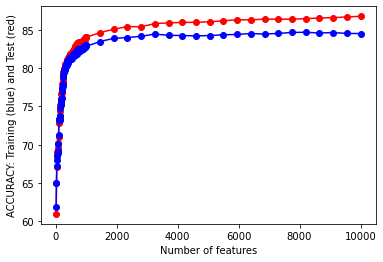

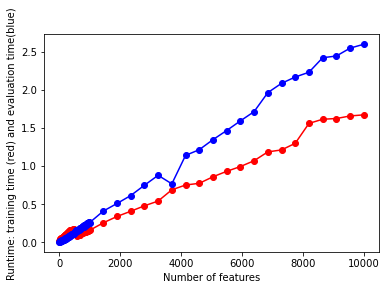

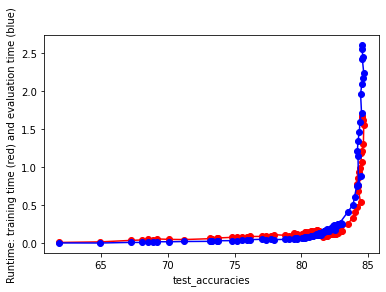

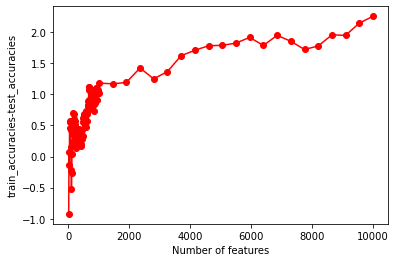

In [232]:
#UTILITY FUNCTION TO PLOT RESULTS
def plot_results(path_root):

    #PLOT-1
    plt.plot(num_features,train_accuracies,'-or')
    plt.plot(num_features,test_accuracies,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('ACCURACY: Training (blue) and Test (red)')
    plt.savefig(path_root+'-1.png')
    plt.show()

    # #PLOT-2
    plt.plot(num_features,train_time,'-or')
    plt.plot(num_features,eval_time,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('Runtime: training time (red) and evaluation time(blue)')
    plt.savefig(path_root+'-2.png')
    plt.show()

    # #PLOT-3
    plt.plot(np.array(test_accuracies),train_time,'-or')
    plt.plot(np.array(test_accuracies),eval_time,'-ob')
    plt.xlabel('test_accuracies')
    plt.ylabel('Runtime: training time (red) and evaluation time (blue)')
    plt.savefig(path_root+'-3.png')
    plt.show()

    # #PLOT-3
    plt.plot(num_features,np.array(train_accuracies)-np.array(test_accuracies),'-or')
    plt.xlabel('Number of features')
    plt.ylabel('train_accuracies-test_accuracies')
    plt.savefig(path_root+'-4.png')
    plt.show()

In [ ]:
save_results(output_dir+"/partial_grid_search")
plot_results(output_dir+"/partial_grid_search")

#### Search-2: Random search (V1: SLOW)

In [238]:
# INITIALIZE ARRAYS
initialize_arrays()

# FIRST FEATURE 
features=[random.randint(0, x.shape[1])]; #print(features)
max_iter=500

# STORE ATTEMPTS
already_tried=[]

for iter in range(0,max_iter):
    if iter%50==0: print(iter,len(features),len(already_tried))
    if(iter==0):
        xtmp=x[:,features]
        (acc_train,acc_test,time_train,time_eval)=train_MNB_model(xtmp,y,i_print=False)
        acc_train_im1=acc_train
    else:
        didnt_find=True
        while(didnt_find or len(features)+len(already_tried)>0.8*x.shape[1]):
            # NEW TRIAL FEATURE  
            new_feature=random.randint(0, x.shape[1])
            if new_feature not in features and new_feature not in already_tried:
                # ADD NEW TRIAL FEATURE FROM LIST
                features.append(new_feature); 
                # FEATURE SUBSET
                xtmp=x[:,features]

                # TRAIN 
                (acc_train,acc_test,time_train,time_eval)=train_MNB_model(xtmp,y,i_print=False)

                # ACCEPTANCE CRITERION 
                if(acc_train-acc_train_im1>0):
                    #print(features)
                    acc_train_im1=acc_train                    
                    #RECORD 
                    num_features.append(xtmp.shape[1])
                    train_accuracies.append(acc_train)
                    test_accuracies.append(acc_test)
                    train_time.append(time_train)
                    eval_time.append(time_eval)

                    didnt_find=False
                else:
                    # RECORD ATTEMPT
                    already_tried.append(new_feature)

                    # REMOVE NEW TRIAL FEATURE FROM LIST
                    features.pop()

0 1 0
50 50 34
100 100 66
150 150 112
200 200 150
250 250 199
300 300 260
350 350 315
400 400 362
450 450 485


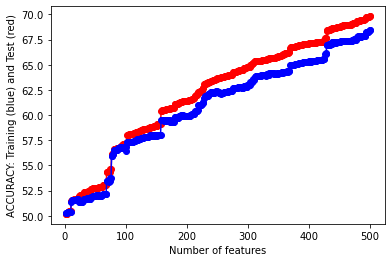

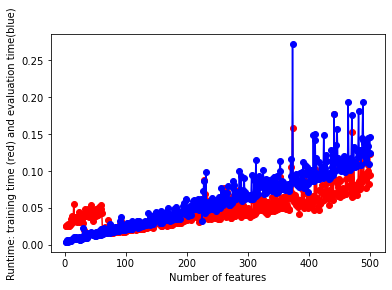

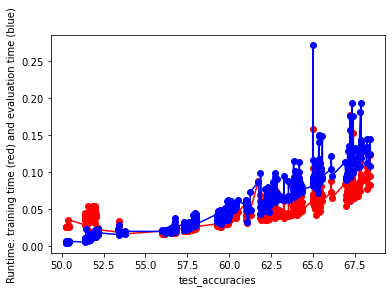

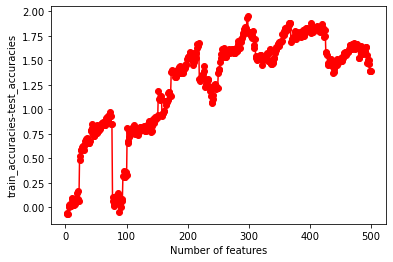

In [239]:
# CHECK RESULTS 
save_results(output_dir+"/random_search")
plot_results(output_dir+"/random_search")

#### VarianceThreshold

In [250]:
x_var=np.var(x,axis=0)
print(np.min(x_var))
print(np.max(x_var))

0.00021995160000001188
0.248044591600055


In [253]:
from sklearn.feature_selection import VarianceThreshold

# DEFINE GRID OF THRESHOLDS 
num_thresholds=30
thresholds=np.linspace(np.min(x_var),np.max(x_var),num_thresholds)

#DOESN"T WORK WELL WITH EDGE VALUES 
thresholds=thresholds[1:-2]; #print(thresholds)

# INITIALIZE ARRAYS
initialize_arrays()

# SEARCH FOR OPTIMAL THRESHOLD
for THRESHOLD in thresholds:
    feature_selector = VarianceThreshold(threshold=THRESHOLD)
    xtmp=feature_selector.fit_transform(x)
    print("THRESHOLD =",THRESHOLD, xtmp.shape[1])

    (acc_train,acc_test,time_train,time_eval)=train_MNB_model(xtmp,y,i_print=False)
             
    #RECORD 
    num_features.append(xtmp.shape[1])
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    train_time.append(time_train)
    eval_time.append(time_eval)

THRESHOLD = 0.00876562884138122 1696
THRESHOLD = 0.017311306082762424 870
THRESHOLD = 0.02585698332414363 553
THRESHOLD = 0.03440266056552484 382
THRESHOLD = 0.042948337806906045 283
THRESHOLD = 0.051494015048287246 208
THRESHOLD = 0.060039692289668455 160
THRESHOLD = 0.06858536953104967 134
THRESHOLD = 0.07713104677243088 103
THRESHOLD = 0.08567672401381209 84
THRESHOLD = 0.0942224012551933 71
THRESHOLD = 0.10276807849657449 60
THRESHOLD = 0.1113137557379557 50
THRESHOLD = 0.1198594329793369 45
THRESHOLD = 0.12840511022071813 36
THRESHOLD = 0.13695078746209932 33
THRESHOLD = 0.14549646470348052 29
THRESHOLD = 0.15404214194486174 24
THRESHOLD = 0.16258781918624293 20
THRESHOLD = 0.17113349642762415 15
THRESHOLD = 0.17967917366900535 12
THRESHOLD = 0.18822485091038657 9
THRESHOLD = 0.19677052815176777 8
THRESHOLD = 0.20531620539314896 8
THRESHOLD = 0.21386188263453018 6
THRESHOLD = 0.22240755987591138 6
THRESHOLD = 0.2309532371172926 5


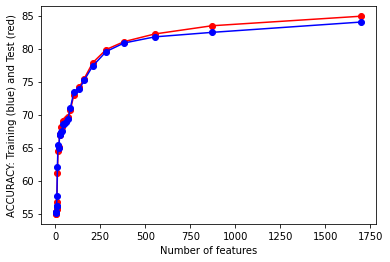

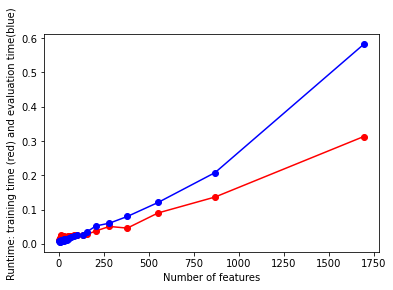

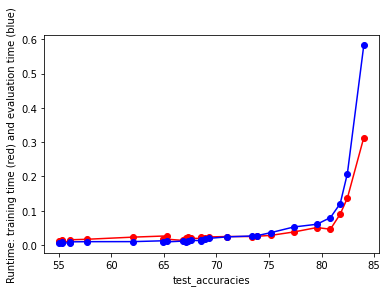

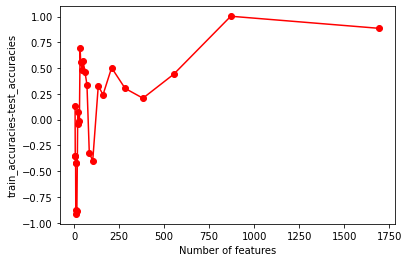

In [254]:
# CHECK RESULTS 
save_results(output_dir+"/variance_threshold")
plot_results(output_dir+"/variance_threshold")

#### Extra code

In [ ]:

    # STOPPING CRITERION 
    # if(xtmp.shape[1]>3000):
    #     xtmp=x


    #  BREAK 
    # if(xtmp.shape[1]>3000):
    #      br`eak


# N_train=int(0.8*N)
# random.shuffle(l)   # randomize
# train_index = random.sample(l, N_train)  #random sample
# print(train_index[0:10])
# test_index =[]
# for i in l:
#     if(i not in train_index):
#         test_index.append(i)
# print(len(train_index),len(test_index))  

In [ ]:
# # INITIALIZE ARRAYS
# initialize_arrays()

# # FIRST FEATURE 
# num_add=5  #add more than one feature at a time 
# features = random.sample(range(0, x.shape[1]), num_add)
# print(features)
# max_iter=500

# # UTILITY FUNCTION:
# # Given two lists a, b. Check if two lists have at least one element common in them.
# # https://www.geeksforgeeks.org/python-check-two-lists-least-one-element-common/
# def no_common_members(a, b):
#     a_set = set(a)
#     b_set = set(b)
#     if len(a_set.intersection(b_set)) > 0:
#         return(False) 
#     return(True)   

# # DEBUGGING CODE
# # print(no_common_members([1,2],[3,4]))
# # print(no_common_members([1,2],[2,4]))
# # new_feature= random.sample(range(0, x.shape[1]), num_add)
# # features=features+new_feature; 
# # print(features)
# # features=features[0:-num_add]; 
# # print(features)

# # # STORE ATTEMPTS
# already_tried=[]

# for iter in range(0,max_iter):
#     if iter%50==0: print(iter,len(features),len(already_tried))
#     if(iter==0):
#         xtmp=x[:,features]
#         (acc_train,acc_test,time_train,time_eval)=train_MNB_model(xtmp,y,i_print=False)
#         acc_train_im1=acc_train
#     else:
#         didnt_find=True
#         while(didnt_find or len(features)+len(already_tried)>0.8*x.shape[1]):
#             # NEW TRIAL FEATURE  
#             new_feature= random.sample(range(0, x.shape[1]), num_add)

#             if no_common_members(new_feature,features) and no_common_members(new_feature,already_tried):
#                 # ADD NEW TRIAL FEATURE FROM LIST
#                 features=features+new_feature; 
#                 # FEATURE SUBSET
#                 xtmp=x[:,features]

#                 # TRAIN 
#                 (acc_train,acc_test,time_train,time_eval)=train_MNB_model(xtmp,y,i_print=False)

#                 # ACCEPTANCE CRITERION 
#                 if(acc_train-acc_train_im1>0):
#                     #print(features)
#                     acc_train_im1=acc_train                    
#                     #RECORD 
#                     num_features.append(xtmp.shape[1])
#                     train_accuracies.append(acc_train)
#                     test_accuracies.append(acc_test)
#                     train_time.append(time_train)
#                     eval_time.append(time_eval)

#                     didnt_find=False
#                 else:
#                     # RECORD ATTEMPT
#                     already_tried=already_tried+new_feature; 

#                     # REMOVE NEW TRIAL FEATURE FROM LIST
#                     features=features[0:-num_add]